<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 4. Paleo-climate
## Temperature record
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we play with a temperature record from the german observatory **Hohenpeissenberg**
in Bavaria, and derive some filter examples, using `python`.

We first initialize the `python` libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Yearly temperatures from the Hohenpeissenberg Observatory in Bavaria

Next, read read in the data. In the `data` folder, there is a file called `Hohenpeissenberg.temp`. It's 
structure is:

| year      | temp|
|-----------|-----|
| 1781      | 7.14|
| 1782      | 5.63|

A header line, then two colums of data, one for the year, on is temperature.

We read this file in with the `loadtxt` module of `numpy`. Note that we read is in twice,
once for the first column, once for the second column. 
Of course, there are more elegant ways to perform this task ...

In [2]:
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/Hohenpeissenberg.temp'
year=np.loadtxt(fname=infile1,skiprows=1,usecols=0)
temp=np.loadtxt(fname=infile1,skiprows=1,usecols=1)
print (type(year),year.shape)
print (type(temp),temp.shape)

<class 'numpy.ndarray'> (223,)
<class 'numpy.ndarray'> (223,)


Next, we plot the data. To be more flexible, we embed the entire plotting task to a function. As last line, we call the function to test it.

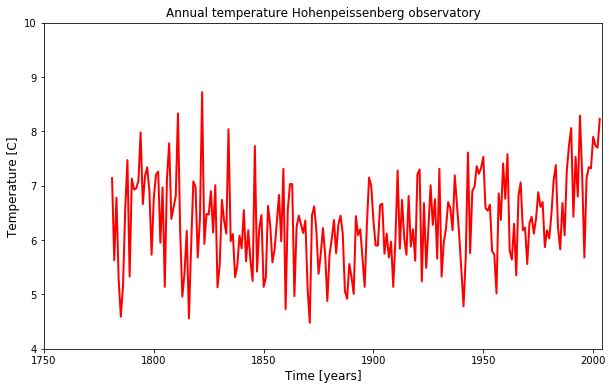

In [3]:
#-----------------------------------------------------------------------
# define function to plot 
#-----------------------------------------------------------------------
def temp_plot():
    plt.figure(figsize=(10.0, 6.0))
    plt.xlabel('Time [years]',size=12)
    plt.ylabel('Temperature [C]',size=12)
    plt.title('Annual temperature Hohenpeissenberg observatory',size=12)
    plt.plot(year,temp,color='red',linestyle='-',linewidth=2)
    plt.xlim([1750,2004])
    plt.ylim([4,10])
    plt.show()
    
temp_plot()

We now modify the function to calculate a second field, the running average. Note the difference:

- The argument `average` is added, the average years to smooth over.

- Two fields, `yearsum` and `tempsum` are introduced for the averages.

- Then we run a loop over all data (minus the average number not to overshoot), sum up over the
averaged values, divide by the average, and plot this second function (last line).

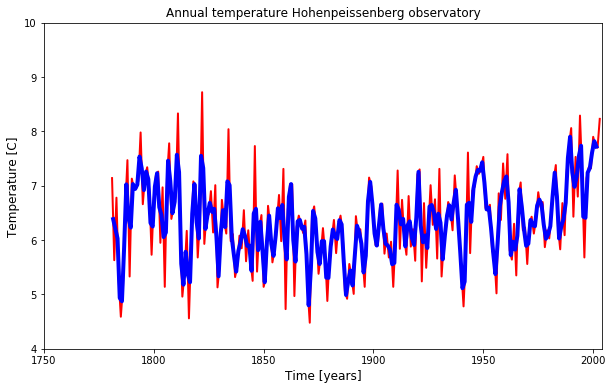

In [7]:
#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def temp_plot(average=10):
    plt.figure(figsize=(10.0, 6.0))
    plt.xlabel('Time [years]',size=12)
    plt.ylabel('Temperature [C]',size=12)
    plt.title('Annual temperature Hohenpeissenberg observatory',size=12)
    yearsum = np.zeros(len(year)-average)
    tempsum = np.zeros(len(temp)-average)
    #print(yearsum.shape)
    for i in range(len(temp[:])-average):
        yearsum[i] = sum(year[i:i+average]) / float(average)
        tempsum[i] = sum(temp[i:i+average]) / float(average)
    plt.plot(year,temp,color='red',linestyle='-',linewidth=2)
    plt.plot(yearsum,tempsum,color='blue',linestyle='-',linewidth=4)
    plt.xlim([1750,2004])
    plt.ylim([4,10])
    plt.show()

temp_plot(10)

Finally, we embed this plotting function into `ipywidgets` interactive module to provide
a slider.

In [8]:
# call interactive module
w = dict(average=widgets.IntSlider(min=1,max=50,step=1,value=2,continuous_update=False,description='no of years'))
output = widgets.interactive_output(temp_plot, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

## Stable Hydrogen record in Vostok and Dome C ice cores

Here is another example from the lecture, the stable hydrogen records from the **Vostok** and the 
**Dome C** ice cores.

Note the use of different interactive elements, the *range slider* and the *checkbox*!

In [9]:
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/Vostok_dH.x'
year1=np.loadtxt(fname=infile1,skiprows=1,usecols=0)
Vostok_dH=np.loadtxt(fname=infile1,skiprows=1,usecols=1)
infile2='data/DomeC_dH.x'
year2=np.loadtxt(fname=infile2,skiprows=1,usecols=0)
DomeC_dH=np.loadtxt(fname=infile2,skiprows=1,usecols=1)

#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def dH_plot(minmax,vostok,domec):
    min = minmax[0]
    max = minmax[1]
    plt.figure(figsize=(12.0, 6.0))
    plt.xlabel('Time [years]',size=12)
    plt.ylabel('$\delta$H [\u2030]',size=12)
    plt.title('Hydrogen isotope record from ice cores',size=12)
    if (vostok):
        plt.plot(year1,Vostok_dH,color='red',linestyle='-',linewidth=1,label='Vostok')
    if (domec):
        plt.plot(year2,DomeC_dH,color='blue',linestyle='-',linewidth=1,label='Dome C')
    plt.xlim([min,max])
    plt.ylim([-500,-350])
    plt.legend(loc='upper right')
    plt.show()
    
# call interactive module
w = dict(minmax=widgets.IntRangeSlider(min=0,max=700000,step=1000,value=[1,700000],continuous_update=False,description='time (years)'),
         vostok=widgets.Checkbox(value=True,description='Vostok',disabled=False),
         domec=widgets.Checkbox(value=False,description='Dome C',disabled=False))
output = widgets.interactive_output(dH_plot, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)

... done